<a href="https://colab.research.google.com/github/saiharishsarma/Onlline-Retail-Customer-Segmentation-Project/blob/main/Online_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

**In this Project, Our task is to identify major segments on a transnational data set which contains the transactions occuring between 01/12/2010 and 09/12/2011 for a UK based and registered non-store online retail. The company mainly sells unique all- occation gifts. Many customers of the company are wholesalers.**

# **Business Context**

***Businesses are growing rapidly and serving many customers. So, It is very important to categorize their customers to understand the customer and Business behaviour. It also helps in marketing and Business development.***

# **Github Link:**

https://github.com/saiharishsarma/Onlline-Retail-Customer-Segmentation-Project

# **Data Description**

**InvoiceNo: Invoice Number ( Some Invoice No.s are with letter 'C', means cancelled Transaction)(Numeric)**

**StockCode: Stock Name Code**

**Description:Description of the product (Numeric)**

**Quantity: Quantity bought (Numeric)**

**InvoiceDate: Invoice Date (Date Time)**

**UnitPrice: Price per Unit (Numeric)**

**CustomerID: Unique Customer ID (Numeric)**

**Country: Location**

In [1296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn import metrics

In [1297]:
# Loading Data Set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1299]:
filepath= ('/content/drive/MyDrive/Colab Notebooks/Clustering Unsupervised ML Project/Online Retail.xlsx')
data=pd.read_excel(filepath)

In [1300]:
#Size of the dataet
data.shape

(541909, 8)

In [1301]:
## View of First 5 rows of Data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [1302]:
# View of last 5 rows of Data
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [1303]:
# Details of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [1304]:
# Getting the list of Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [1305]:
# Getting Summary of Data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [1306]:
#Unique values Count Column Wise
data.nunique()


InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

# **Data Cleaning**

**Handling Missing Values:**

In [1307]:
# Checking for Null Values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: xlabel='index', ylabel='0'>

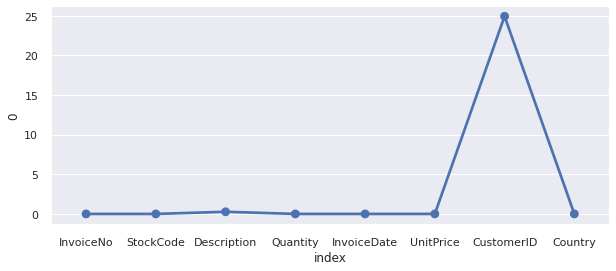

In [1308]:
# Plotting the Missing Values Percentage
Missings= pd.DataFrame((data.isnull().sum()/data.shape[0])*100).reset_index()
plt.figure(figsize=(10,4))
sns.pointplot(x='index',y=0,data=Missings)


In [1309]:
Missings.T


,0,1,2,3,4,5,6,7
index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


***CustomerID is having 24.92% of missing values.***

***Description is having 0.26% of missing values.***

In [1310]:
data['CustomerID'].isnull().sum(), data['Description'].isnull().sum()

(135080, 1454)

**Dropping Null Values Rows using dropna() method**

In [1311]:
data=data.dropna()

In [1312]:
data.shape

(406829, 8)

In [1313]:
# Checking for Null Values after removal of Nulls
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**There is no null value.**

**Duplication Check:**

In [1314]:
#Using Duplicated() Method
len(data[data.duplicated()])

5225

In [1315]:
data[data.duplicated()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


***We have 5225 duplicate/ repeated entries. We can drop them from the dataset.***

In [1316]:
data=data.drop_duplicates()

In [1317]:
len(data[data.duplicated()])

0

In [1318]:
data.shape

(401604, 8)

***The duplicate entries removed. Now the dataset having 401604 observations.***

# **Handling Columns:**

**Invoice No:**

**We have few cancelled Invoice No.s indicated with C.**
**We can remove them.**

In [ ]:
# Converting Invoice ID to string format.
data['InvoiceNo']=data['InvoiceNo'].astype('str')
data[data['InvoiceNo'].str.contains('C')]

**There are 8872 cancelled Invoices.**

In [1320]:
data= data[~data['InvoiceNo'].str.contains('C')]

In [1321]:
data.shape

(392732, 8)

***After removal of cancelled Invoice rows, no. of rows are 392732.***

**Invoice Date:**

***Extracting Year, Month and Day from this column will help in doing in depth data analysis.***

In [1327]:
data['Day']=data['InvoiceDate'].dt.day
data['Month']=data['InvoiceDate'].dt.month
data['Year']=data['InvoiceDate'].dt.year

In [1328]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010


**Removing Unnecessary Columns:**

**Stock Code is not easy to understand where as Description Column gives more information. We can remove Stock Code Column.**

In [1333]:
data=data.drop('StockCode', axis=1)
data.head(2)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010


In [1334]:
data.shape

(392732, 10)

# **EDA**

# **Univariate Analysis:**

In [1335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   Description  392732 non-null  object        
 2   Quantity     392732 non-null  int64         
 3   InvoiceDate  392732 non-null  datetime64[ns]
 4   UnitPrice    392732 non-null  float64       
 5   CustomerID   392732 non-null  float64       
 6   Country      392732 non-null  object        
 7   Day          392732 non-null  int64         
 8   Month        392732 non-null  int64         
 9   Year         392732 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 33.0+ MB


**Categorical Variables:**

**Country:**

In [347]:
#Creating a Dataframe containing Count of entries of each country
Top_Countries= pd.DataFrame(data['Country'].value_counts().reset_index())
Top_Countries.rename(columns={'index':'Country','Country':'Count'}, inplace=True)

<BarContainer object of 5 artists>

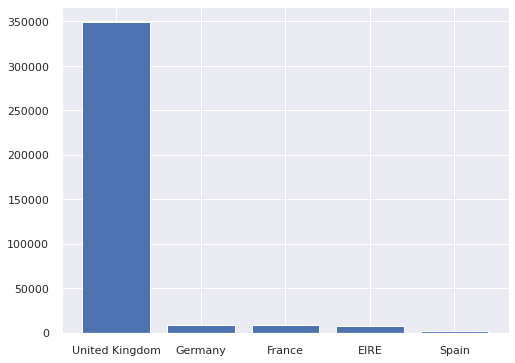

In [348]:
# Plotting Visualization for first Top 5 Countries
plt.figure(figsize=(8,6))
plt.bar('Country', 'Count', data=Top_Countries.head())

***The retail store has a large share in local region i.e., UK.***

<BarContainer object of 5 artists>

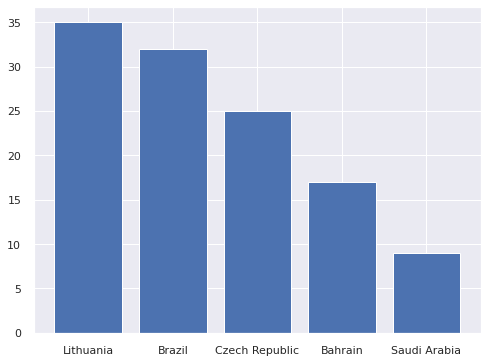

In [349]:
# Plotting Visualization for least  5 Countries
plt.figure(figsize=(8,6))
plt.bar('Country', 'Count', data=Top_Countries.tail())

***The store has least market share in Saudi Arabia.***

**Description:**

In [350]:
# Creating a Dataframe containing Count of entries of each Description of product
Top_Items= pd.DataFrame(data['Description'].value_counts().reset_index())
Top_Items.rename(columns=({'index':'Description', 'Description':'Count'}),inplace=True)

In [351]:
Top_Items

,Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390
...,...,...
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1


***There are 3877 Unique Descriptions available in Dataset.***

<BarContainer object of 5 artists>

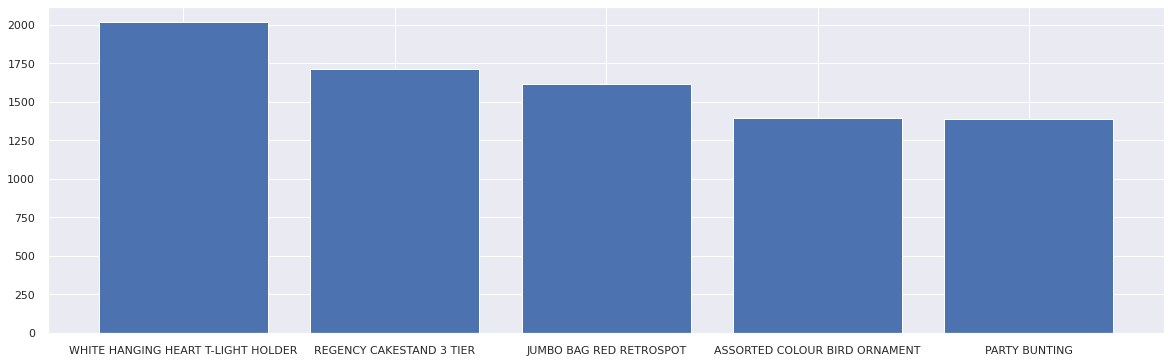

In [352]:
# Plotting Visualization
plt.figure(figsize=(20,6))
plt.bar('Description', 'Count', data=Top_Items.head())

***Above 5 Descriptions are the top 5 among all Descriptions i.e., products.***

**Numerical Variables:**

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   Description  392732 non-null  object        
 2   Quantity     392732 non-null  int64         
 3   InvoiceDate  392732 non-null  datetime64[ns]
 4   UnitPrice    392732 non-null  float64       
 5   CustomerID   392732 non-null  float64       
 6   Country      392732 non-null  object        
 7   Day          392732 non-null  int64         
 8   Month        392732 non-null  int64         
 9   Year         392732 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 33.0+ MB


**Customer ID:**

In [354]:
#Creating a Dataframe containing Count of entries of each Customer ID
Top_CustomerID= pd.DataFrame(data['CustomerID'].value_counts().reset_index())
Top_CustomerID.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)


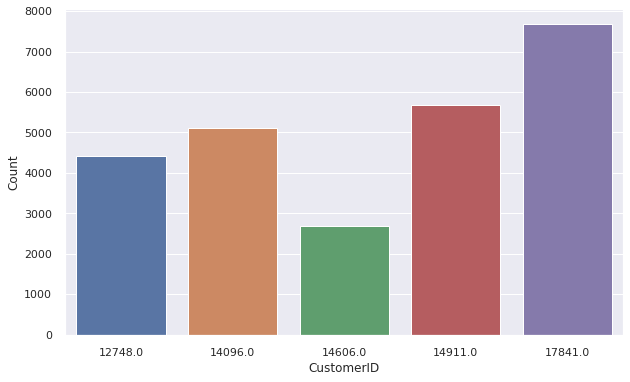

In [355]:
# Plotting Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=Top_CustomerID.head(),x='CustomerID',y='Count')
plt.show()

***Customer ID : 17841 is top most customer by having large count in No. of Purchases.***

**Unit Price:**

In [356]:
#Creating a Dataframe containing Count of entries of each Unit Price
UnitPrice_DF=data['UnitPrice'].value_counts().reset_index().rename(columns={'index':'UnitPrice','UnitPrice':'Count'})

<Axes: xlabel='UnitPrice', ylabel='Count'>

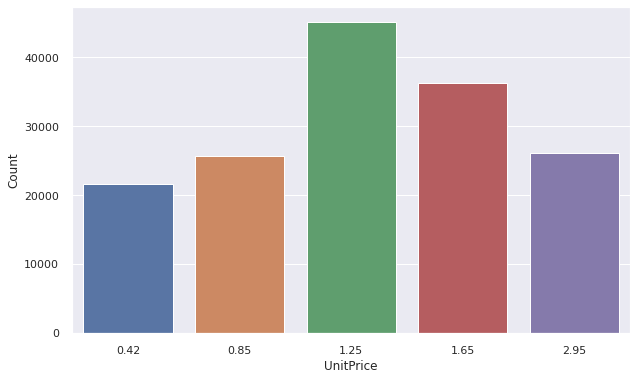

In [357]:
# Plotting Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=UnitPrice_DF.head(), x='UnitPrice',y='Count')

***The Products having price of 1.25 dollars are the selling products.***

**Quantity:**

In [358]:
#Creating a Dataframe containing Count of entries of each Quantity
Quantity_DF=data['Quantity'].value_counts().reset_index().rename(columns={'index':'Quantity','Quantity':'Count'})

In [359]:
Quantity_DF.head()

,Quantity,Count
0,1,69605
1,12,59828
2,2,57425
3,6,37480
4,4,32093


<Axes: xlabel='Quantity', ylabel='Count'>

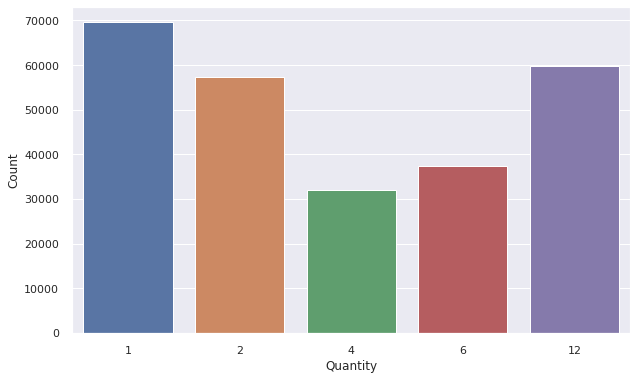

In [360]:
# Plotting Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=Quantity_DF.head(5), x='Quantity',y='Count')

***Most No. of Purchaces having quantity of One.***

**Day:**

In [361]:
#Creating a Dataframe containing Count of entries of each Day 
Day_DF=data['Day'].value_counts().reset_index().rename(columns={'index':'Day','Day':'Count'})

In [362]:
Day_DF.head()

,Day,Count
0,6,18079
1,5,16128
2,8,15621
3,7,15429
4,17,14730


<Axes: xlabel='Day', ylabel='Count'>

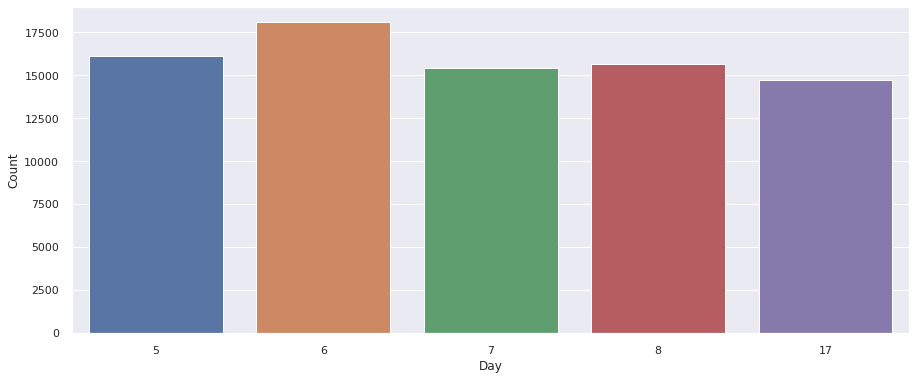

In [363]:
# Plotting Visualization
plt.figure(figsize=(15,6))
sns.barplot(data=Day_DF.head(), x='Day',y='Count')

***Day 6 of the month is having highest purchace count asper the data set.***

**Month:**

In [364]:
#Creating a Dataframe containing Count of entries of each Month
Month_DF=data['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Count'})

In [365]:
Month_DF

,Month,Count
0,11,63182
1,10,48796
2,12,42699
3,9,39671
4,5,28075
5,6,26926
6,3,26872
7,8,26796
8,7,26582
9,4,22435


<Axes: xlabel='Month', ylabel='Count'>

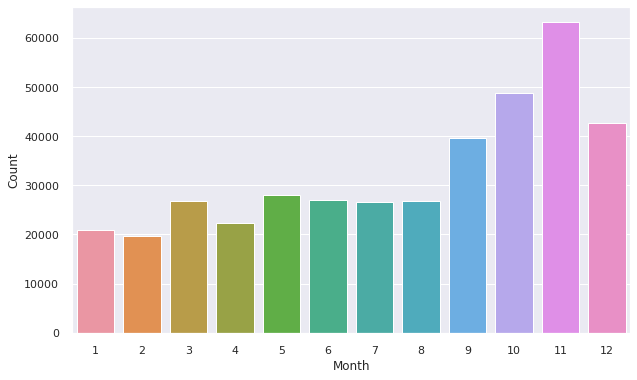

In [366]:
# Plotting Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=Month_DF, x='Month',y='Count')

***November & October months having highest purchace count.***

**Year:**

In [367]:
#Creating a Dataframe containing Count of entries of each Year
Year_DF=data['Year'].value_counts().reset_index().rename(columns={'index':'Year','Year':'Count'})

<Axes: xlabel='Year', ylabel='Count'>

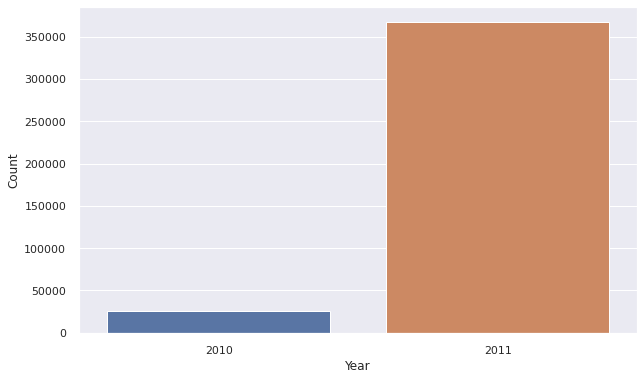

In [368]:
# Plotting Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=Year_DF, x='Year',y='Count')

***As our data set is between 01/12/2010 and 09/12/2011, The year 2011 having most of it's purchaces.***

# **Bivariate Analysis:**

**Invoice No with Quantity:**

In [369]:
# Creating Data Frame containing Quantity Top 5 Invoice No.s having huge Quantity
Invoice_qty_DF=data.groupby('InvoiceNo').sum()['Quantity'].sort_values(ascending=False)

Text(0, 0.5, 'Quantity')

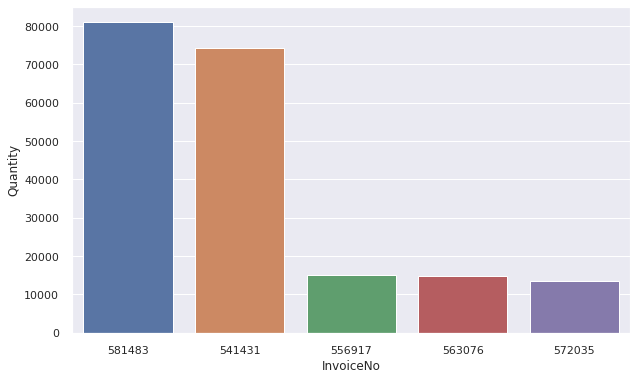

In [370]:
# Plotting Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=Invoice_qty_DF.head().index, y=Invoice_qty_DF.head().values)
plt.ylabel('Quantity')

***Invoice No. 581483 is involved with large quantity.***

**Customer ID with Quantity:**

In [371]:
# Creating Data Frame containing Quantity Top 5 Customer IDs having huge Quantity
Customer_qty_DF=data.groupby('CustomerID').sum()['Quantity'].sort_values(ascending=False)

In [372]:
Customer_qty_DF.head()

CustomerID
14646.0    197491
16446.0     80997
14911.0     80490
12415.0     77670
12346.0     74215
Name: Quantity, dtype: int64

Text(0, 0.5, 'Quantity')

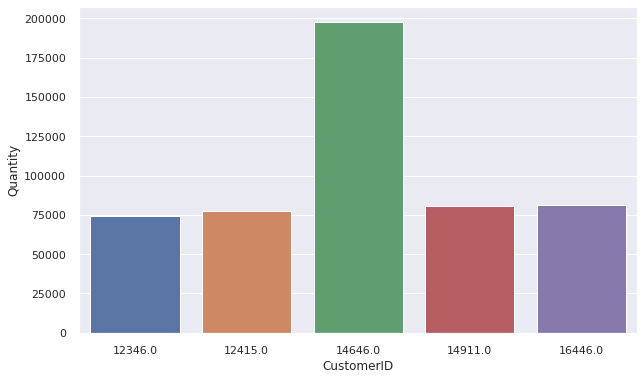

In [373]:
# Plotting Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=Customer_qty_DF.head().index, y=Customer_qty_DF.head().values)
plt.ylabel('Quantity')

***Customer with ID 14646 is the buyer of large quantity of the store.***

**Description(Product) with Quantity:**

In [374]:
# Creating Data Frame containing Quantity Top 5 Products having huge Quantity
Desc_qty_DF=data.groupby('Description').sum()['Quantity'].sort_values(ascending=False)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PAPER CRAFT , LITTLE BIRDIE'),
  Text(1, 0, 'MEDIUM CERAMIC TOP STORAGE JAR'),
  Text(2, 0, 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'),
  Text(3, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(4, 0, 'WHITE HANGING HEART T-LIGHT HOLDER')])

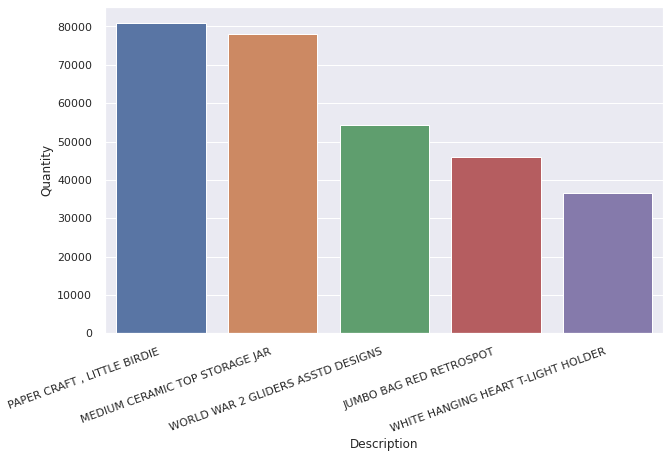

In [375]:
# Plotting Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=Desc_qty_DF.head().index, y=Desc_qty_DF.head().values)
plt.ylabel('Quantity')
plt.xticks(rotation=20, ha='right')

***The product having description as "PAPER CRAFT , LITTLE BIRDIE" is the most selling product in store.***

# **Feature Engineering**

In [376]:
# Creating List of Numeric Columns
Numeric_Cols=['Quantity', 'UnitPrice','CustomerID', 'Day', 'Month', 'Year']

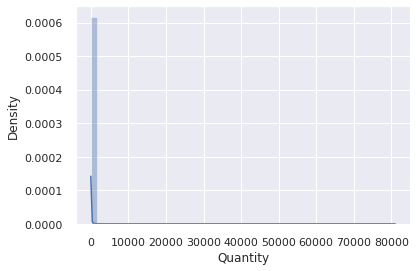

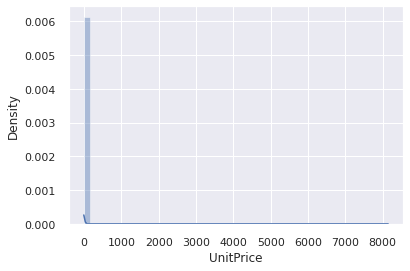

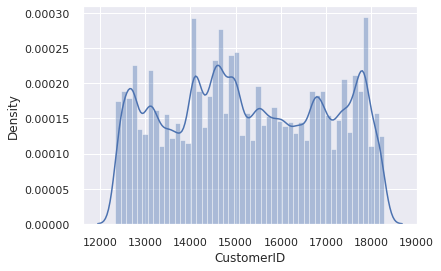

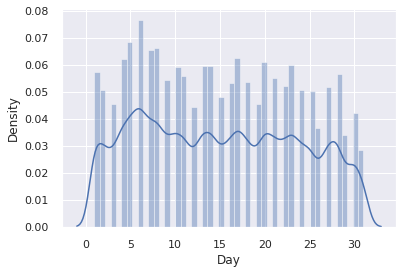

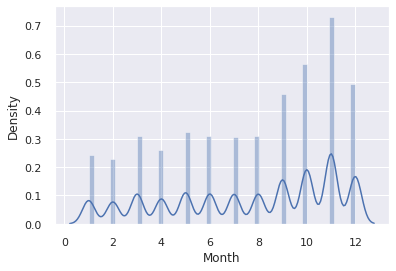

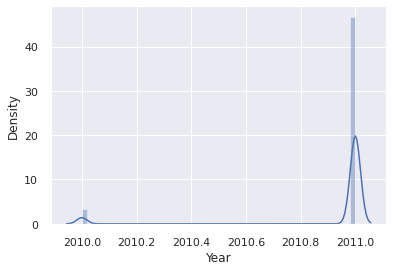

In [377]:
# Plotting Distribution of each Numeric Column in dataset
for i in Numeric_Cols:
  plt.figure(figsize=(6,4))
  sns.distplot(data[i])
  plt.show()

**Handling Outliers:**

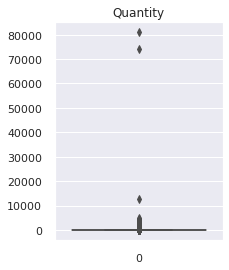

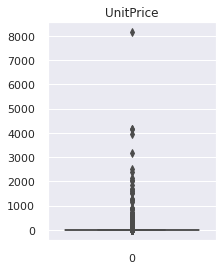

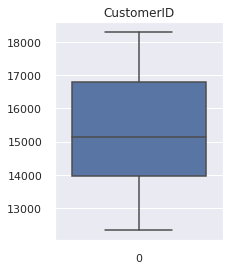

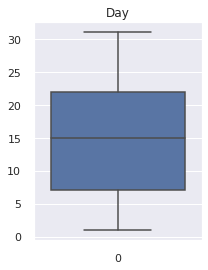

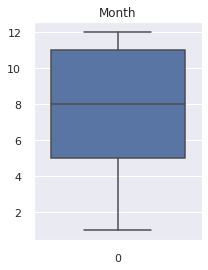

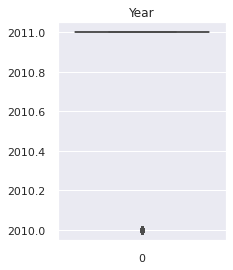

In [378]:
# Plotting Box Plots for identifying outliers
for i in (Numeric_Cols):
  plt.figure(figsize=(3,4))
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()

**From the above boxplots, it is clear that outliers available with Quantity and UnitPrice Columns.**

In [380]:
data[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,392732.000000,392732.000000
mean,13.153718,3.125596
std,181.588420,22.240725
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [381]:
# Creating a function for outlier removal
def outliers_removal(data, column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1
  Ulimit= Q3+(IQR*1.5)
  Llimit= Q1-(IQR*1.5)
  if Llimit <0:
    data=data[data[column]<=Ulimit]
  else:
    data=data[(data[column]>=Llimit) & (data[column]<=Ulimit)]
  return data

In [382]:
#Applying Outlier Function on Columns
data=outliers_removal(data=data, column='Quantity')
data=outliers_removal(data=data, column='UnitPrice')

<Axes: xlabel='Quantity', ylabel='Density'>

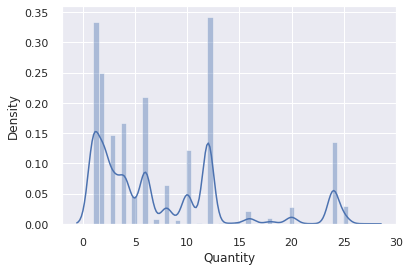

In [1293]:
sns.distplot(data['Quantity'])


<Axes: xlabel='UnitPrice', ylabel='Density'>

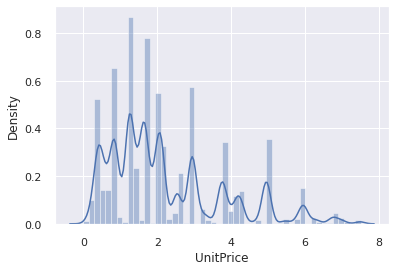

In [1294]:
 sns.distplot(data['UnitPrice'])

***Finally, Outliers are removed.***

**Correlation Check:**

<Axes: >

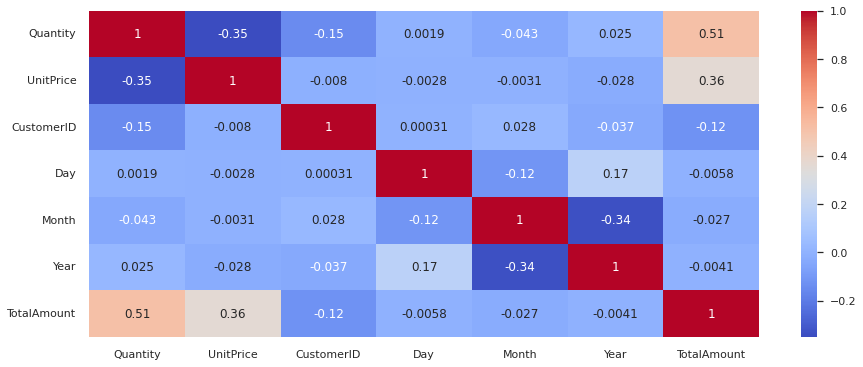

In [1295]:
plt.figure(figsize=(15,6))
sns.heatmap((data.corr()), annot=True, cmap='coolwarm')

**From above heat map, we can conclude that there is no major correlation available in data set.**

In [1344]:
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010


In [1345]:
data['TotalAmount']=data['Quantity'] * data['UnitPrice']

In [1346]:
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,TotalAmount
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34


# **RFM Analysis**

**RFM - Recency, Frequency and Monetory is a Marketing Analysis tool used for customer segmentation.**

**Recency: How recently user bought/ visited.**

**Frequency: How regularly user purchase/ visits.**

**Monetory: How much revenue generated by that user.**

**A the part of our project, we make a Dataframe by extracting above features and use them for Clustering.**


In [1347]:
# For getting Frequency, we need to set a limit date.
Last_Date=dt.datetime(2011,12,10)

In [1348]:
# Creating Data Frame
RFMDF=data.groupby('CustomerID').agg({'InvoiceDate': lambda x:(Last_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

In [1349]:
RFMDF['InvoiceDate']=RFMDF['InvoiceDate'].astype(int)

In [1350]:
# Renaming the columns
RFMDF=RFMDF.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetory'})

In [1351]:
# Reststing the Index of Dataframe
RFMDF=RFMDF.reset_index()

In [1352]:
# Information of Dataframe
RFMDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetory    4339 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


In [1356]:
# A brief Summary of data in the Data Frame
RFMDF.describe()

,CustomerID,Recency,Frequency,Monetory
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.041484,90.512100,2048.215924
std,1721.889758,100.007757,225.515328,8984.248352
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,17.000000,306.455000
50%,15299.000000,50.000000,41.000000,668.560000
75%,16778.500000,141.500000,98.000000,1660.315000
max,18287.000000,373.000000,7676.000000,280206.020000


**Plotting the Distribution of RFM Columns:**

<Axes: xlabel='Recency', ylabel='Density'>

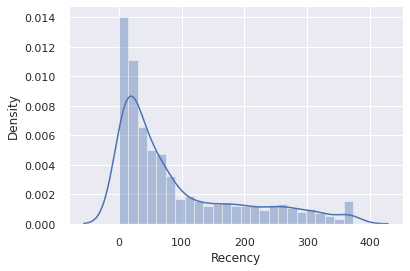

In [1358]:
sns.distplot(RFMDF['Recency'])



<Axes: xlabel='Frequency', ylabel='Density'>

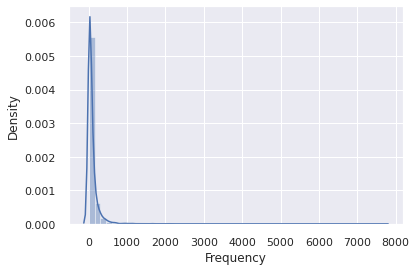

In [1359]:
sns.distplot(RFMDF['Frequency'])

<Axes: xlabel='Monetory', ylabel='Density'>

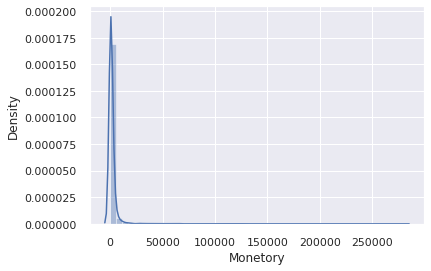

In [1360]:
sns.distplot(RFMDF['Monetory'])

In [1363]:
# To avoid infinities and negative values after transformation,  Defining A function 
def Treat_neg_zero(num):
  if num <=0:
    return 1
  else:
    return num

In [1364]:
# Applying Function
RFMDF['Recency']=[Treat_neg_zero(x) for x in RFMDF.Recency]
RFMDF['Monetory']=[Treat_neg_zero(x) for x in RFMDF.Monetory]

In [1366]:
# Applying Log Transformation on data using np.log
RFMDF['Recency_log']=RFMDF['Recency'].apply(np.log)
RFMDF['Frequency_log']=RFMDF['Frequency'].apply(np.log)
RFMDF['Monetory_log']=RFMDF['Monetory'].apply(np.log)

In [1367]:
RFMDF.head()

,CustomerID,Recency,Frequency,Monetory,Recency_log,Frequency_log,Monetory_log
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942
1,12347.0,2,182,4310.00,0.693147,5.204007,8.368693
2,12348.0,75,31,1797.24,4.317488,3.433987,7.494007
3,12349.0,18,73,1757.55,2.890372,4.290459,7.471676
4,12350.0,310,17,334.40,5.736572,2.833213,5.812338


**Plotting the Distribution after Log transformation:**

<Axes: xlabel='Recency_log', ylabel='Density'>

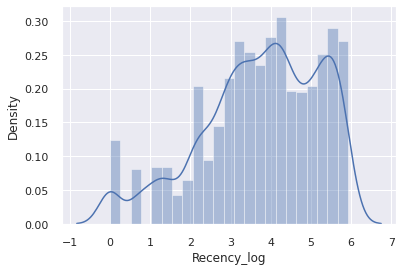

In [1368]:
sns.distplot(RFMDF['Recency_log'])

<Axes: xlabel='Frequency_log', ylabel='Density'>

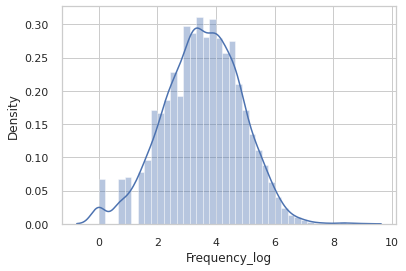

In [1008]:
sns.distplot(RFMDF['Frequency_log'])

<Axes: xlabel='Monetory_log', ylabel='Density'>

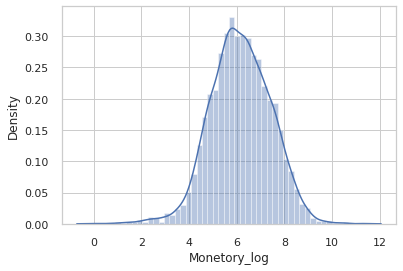

In [1009]:
sns.distplot(RFMDF['Monetory_log'])

***Now, We can use this data for modelling.***

# **Pre Processing**

In [1010]:
# Using Standard Scaler () Method to stabdardize the data.
scaler=StandardScaler()

In [1369]:
# Defining the Modelling Dataframe as X
X=RFMDF[['Recency_log','Frequency_log','Monetory_log']]
X

,Recency_log,Frequency_log,Monetory_log
0,5.783825,0.000000,11.253942
1,0.693147,5.204007,8.368693
2,4.317488,3.433987,7.494007
3,2.890372,4.290459,7.471676
4,5.736572,2.833213,5.812338
...,...,...,...
4334,5.624018,2.302585,5.196285
4335,5.192957,1.945910,4.392224
4336,1.945910,2.484907,5.182064
4337,1.098612,6.580639,7.623412


In [1371]:
#Applying Scaling
X=scaler.fit_transform(X)
X

array([[ 1.38836443e+00, -2.77773554e+00,  3.69026120e+00],
       [-2.06444705e+00,  1.16012199e+00,  1.41020131e+00],
       [ 3.93804279e-01, -1.79246880e-01,  7.18983392e-01],
       ...,
       [-1.21474602e+00, -8.97413521e-01, -1.10802300e+00],
       [-1.78943563e+00,  2.20181597e+00,  8.21245143e-01],
       [ 5.35650412e-04,  4.37089109e-01,  7.36395747e-01]])

# **Model Implementation**

# **1. K Means Model with Elbow Approach**

**Elobow Method:**

In [1373]:
# Using for loop for Elbow Method to get Optimal K
SSE={}
for k in range(1,10):
  KM= KMeans(n_clusters=k, init='k-means++', max_iter=400)
  KM=KM.fit(X)
  SSE[k]=KM.inertia_

Text(0.5, 1.0, 'Elbow Approach for k')

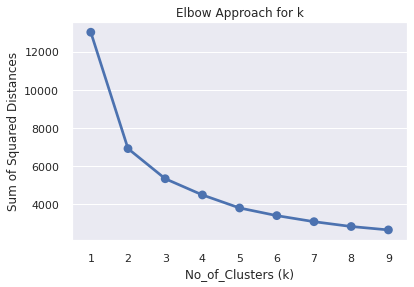

In [1374]:
# Plotting the loop results to get Elbow Curve.
sns.pointplot(x=list(SSE.keys()), y=list(SSE.values()))
plt.xlabel('No_of_Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Approach for k')

***From the above chart, We conclude the No. of Clusters is 2.***

**Defining KMeans Model:**

In [1375]:
Model1 =KMeans(n_clusters=2)

In [1376]:
# Fitting Model on data X
Model1.fit(X)

KMeans(n_clusters=2)

In [1377]:
# Predicting the Model
Y_Model1=Model1.predict(X)

In [1379]:
# Defining Cluster Centers
centers=Model1.cluster_centers_

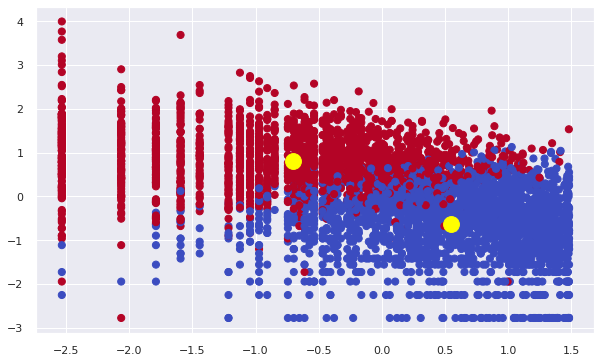

In [1380]:
# Plotting Clustering with centers
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=Y_Model1, s=50, cmap='coolwarm')
plt.scatter(centers[:,0], centers[:,1], s=250, c='yellow', alpha=1.0)

***We can observe that the TWO clusters are clearly differentiated using KMeans- Elbow Approach.***

# **2. K Means Model with Silhouette Approach**

In [1383]:
# Creating Dataframe containing Silhouette Score and No. of Clusters.
Sil_Score_DF=pd.DataFrame(columns=['Sil_Score', 'Clusters'])

In [1384]:
# Using for loop for Silhouette Score and Clusters.
for i in range(2,11):
  Model2=KMeans(n_clusters=i).fit_predict(X)
  Score=silhouette_score(X,Model2)
  Sil_Score_DF= Sil_Score_DF.append({'Sil_Score': Score, 'Clusters': i}, ignore_index= True)

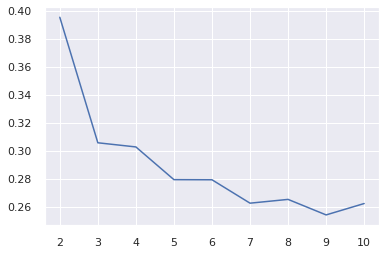

In [1385]:
# Plotting the Score with Clusters No.s
plt.plot(Sil_Score_DF['Clusters'],Sil_Score_DF['Sil_Score'])

***Silhouette Score is high when No. of clusters is 2.***

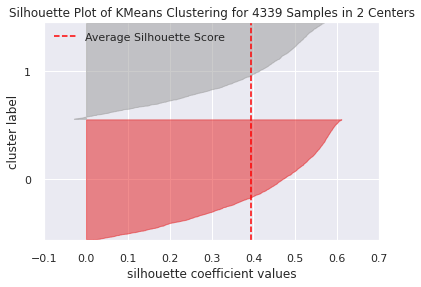

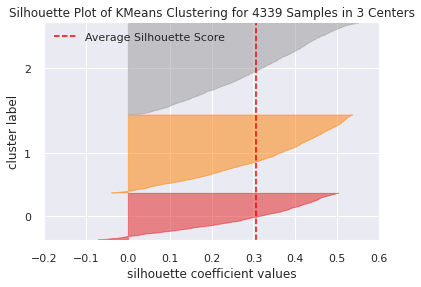

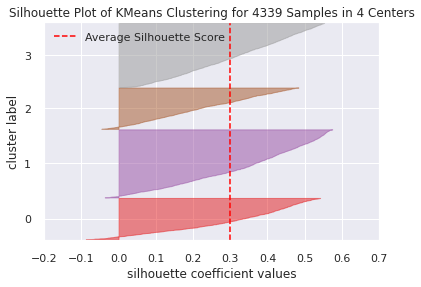

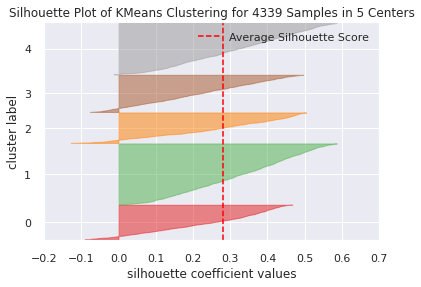

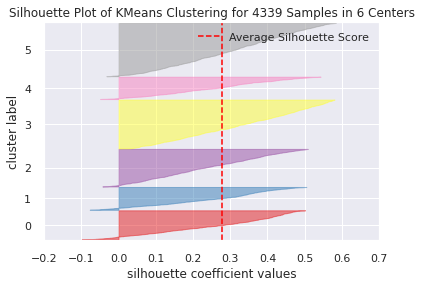

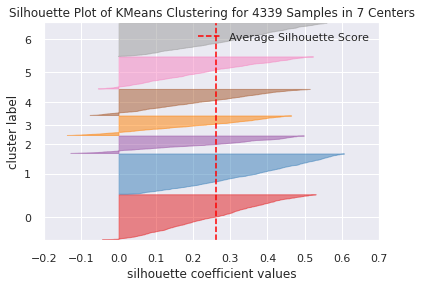

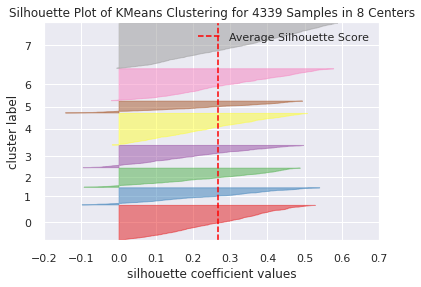

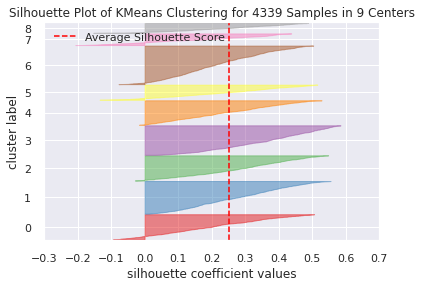

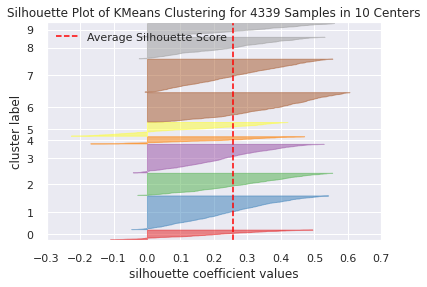

In [1386]:
# Visualizing Score
for i in range(2,11):
  fig.set_size_inches(18,7)
  Model2=KMeans(n_clusters=i)
  visualizer= SilhouetteVisualizer(Model2)
  visualizer.fit(X)
  visualizer.poof()

***Among All Visualizations, negative values are not available for Score having No. of Clussters=2.***

In [1387]:
# Defining the model and Fitting model on Data X
Model2 =KMeans(n_clusters=2)

In [1388]:
Model2.fit(X)

KMeans(n_clusters=2)

In [1390]:
# Predicting the Model
Y_Model2=Model2.predict(X)

In [1391]:
# Defining Cluster Centers
centers=Model2.cluster_centers_

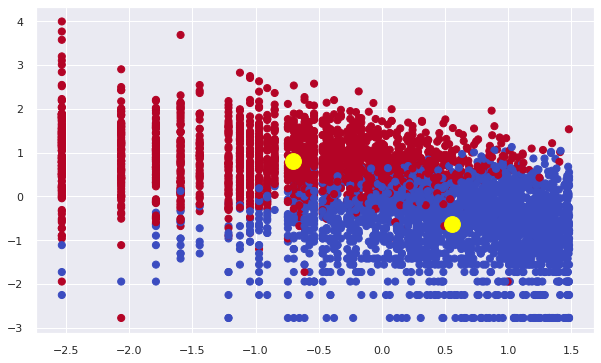

In [1392]:
# Plotting Clustering Visualization
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=Y_Model2, s=50, cmap='coolwarm')
plt.scatter(centers[:,0], centers[:,1], s=250, c='yellow', alpha=1.0)

***We can observe that the TWO clusters are clearly differentiated using KMeans- Silhouette Analysis Approach.***

# **3. Hierarcheal Clustering with Dendrogram**

***In this, We no need to predict the no. of clusters.***

***We will plot the dendrogram on the data.***

***Then we will  find a threshold value, where a line can cuts the longest vertical line. That No. of vertical lines is the no. of clsters.***

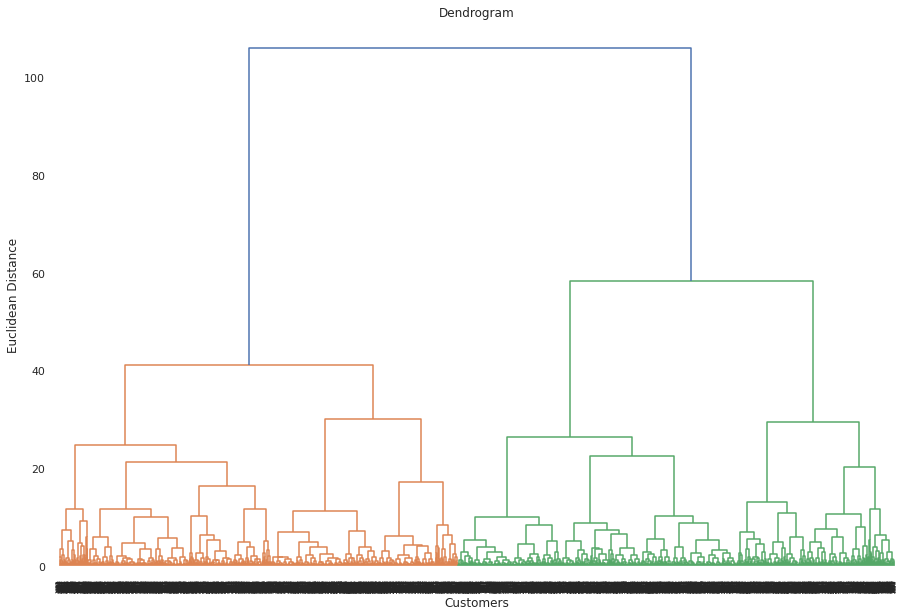

In [1394]:
# Plotting Dendrogram using ward method
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

***If we apply threshold as 80 on y-axis, we can find the no. of clusters.***

***The no. of clusters can be 2.***

In [1395]:
# Defining the model
Model3= AgglomerativeClustering(n_clusters=2, linkage='ward', affinity= 'euclidean' )

In [1396]:
# Fitting the model on data
Y_Model3 = Model3.fit_predict(X)

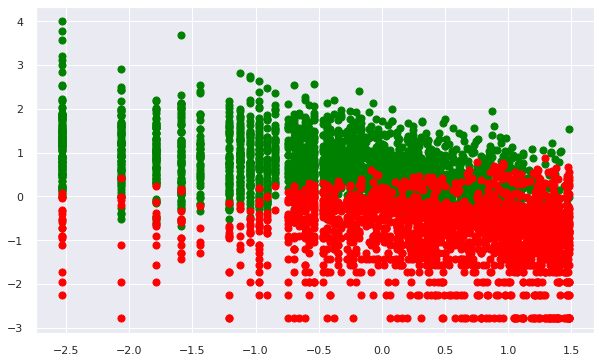

In [1397]:
# Plotting the Clustering
plt.figure(figsize=(10,6))
plt.scatter(X[Y_Model3 == 0,0],X[Y_Model3 == 0,1], c='green',s=50, label='Cluster 1')
plt.scatter(X[Y_Model3 == 1,0],X[Y_Model3 == 1,1], c='red', s=50, label='CLuster 2')
plt.scatter(X[Y_Model3 == 2,0],X[Y_Model3 == 2,1], c='blue', s=50, label='CLuster 3')

***The TWO clusters are clearly seperated using Hierarcheal clustering using Dendrogram Approach.***




# **4. DBSCAN Model**

**DB SCAN ( Distance between nearest points) approach is a density based approach.**

In [1401]:
# Defining the Model with the needed parameters
Model4=DBSCAN(eps=0.5,min_samples=7)

In [1402]:
# Fitting the Model
Y_Model4=Model4.fit_predict(X)

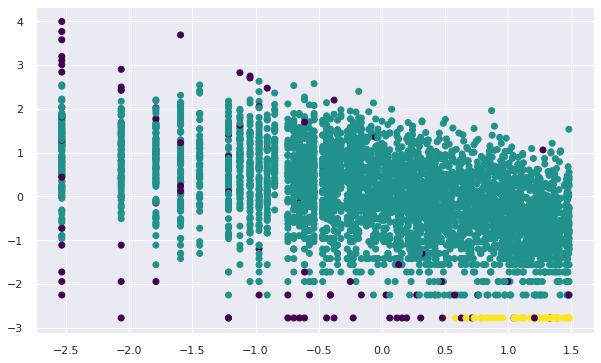

In [1403]:
# Plotting the Clustering
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], alpha=1.0,c=Y_Model4, cmap='viridis')

***The clusters are clearly seperated using DB SCAN clustering. DB Scan also creates few noise data points on clustering, which can exempted. Hence, the no. of optimal clusters can be 2.***


# **Model Explainability**

In [1445]:
# Getting Silhouette Score of All Models
silhouette_score(X,Model1.labels_),\
silhouette_score(X,Model2.labels_), \
silhouette_score(X,Model3.labels_), \
silhouette_score(X,Model4.labels_)

(0.39555007181565494,
 0.39542167913760345,
 0.3561887561169053,
 0.31111658522631125)

***Model1 i.e, KMeans with Elbow Approach having highest Score, Hence, we can conclude that it works better for clustering on this data.***

In [1421]:
# Updating Clusters in RFM Dataframe
RFMDF['Model1Clusters']=Model1.labels_

In [1423]:
RFMDF

,CustomerID,Recency,Frequency,Monetory,Recency_log,Frequency_log,Monetory_log,Model1Clusters
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,0
1,12347.0,2,182,4310.00,0.693147,5.204007,8.368693,1
2,12348.0,75,31,1797.24,4.317488,3.433987,7.494007,0
3,12349.0,18,73,1757.55,2.890372,4.290459,7.471676,1
4,12350.0,310,17,334.40,5.736572,2.833213,5.812338,0
...,...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,5.624018,2.302585,5.196285,0
4335,18281.0,180,7,80.82,5.192957,1.945910,4.392224,0
4336,18282.0,7,12,178.05,1.945910,2.484907,5.182064,0
4337,18283.0,3,721,2045.53,1.098612,6.580639,7.623412,1


In [1425]:
RFMDF.describe()

,CustomerID,Recency,Frequency,Monetory,Recency_log,Frequency_log,Monetory_log,Model1Clusters
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.049551,90.512100,2048.216154,3.736880,3.670868,6.584187,0.439733
std,1721.889758,100.000372,225.515328,8984.248299,1.474527,1.321685,1.265573,0.496412
min,12346.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,13812.500000,17.000000,17.000000,306.455000,2.833213,2.833213,5.725071,0.000000
50%,15299.000000,50.000000,41.000000,668.560000,3.912023,3.713572,6.505126,0.000000
75%,16778.500000,141.500000,98.000000,1660.315000,4.952293,4.584967,7.414763,1.000000
max,18287.000000,373.000000,7676.000000,280206.020000,5.921578,8.945854,12.543280,1.000000


In [1424]:
# Defining CLUSTERS with RFM Features
Results=RFMDF.copy()

In [1430]:
Results.groupby('Model1Clusters').agg({'Recency':['mean', 'min', 'max'],
                                       'Frequency':['mean', 'min', 'max'],
                                       'Monetory': ['mean', 'min', 'max', 'count']})

Recency            Frequency               Monetory  \
                      mean min  max        mean min   max         mean   
Model1Clusters                                                           
0               140.389140   1  373   24.998355   1   174   471.304797   
1                30.459644   1  372  173.983753   1  7676  4057.373130   

                                         
                   min        max count  
Model1Clusters                           
0                 1.00   77183.60  2431  
1               150.61  280206.02  1908

#**Conclusion**

# **A. EDA Outcomes:**

***The retail store has a large share in local region i.e., UK.***

***The store has least market share in Saudi Arabia.***

***There are 3877 Unique Descriptions available in Dataset.***

***Customer ID : 17841 is top most customer by having large count in No. of Purchaces.***

***Customer with ID 14646 is the buyer of large quantity of the store.***

***The product having description as "PAPER CRAFT , LITTLE BIRDIE" is the most selling preoduct in store.***


# **B. Challenges:**

**1. Missing Values - Description &CustomerID are having 0.26% & 24.92% of missing values respectively.**

**2. Duplicated Data - 5225 in count.**

**3. Outliers - Quantity & Unit Price Columns.**



# **C. Modelling Summary:**


***1. We can observe that the TWO clusters are clearly formed using KMeans- Elbow  Approach.***


***2. We can observe that the TWO clusters are clearly defined using KMeans- Silhouette Analysis Approach.***

***3. The TWO clusters are clearly seperated using Hierarcheal clustering using Dendrogram Approach.*** 


***4. The clusters are clearly seperated using DB SCAN clustering. DB Scan also creates few noise data points on clustering, which can exempted. Hence, the no. of optimal clusters can be 2.***


***5. Model1 i.e, KMeans with Elbow Approach having highest Score, Hence, we can conclude that it works better for clustering on this data.***

**6. Finally, We formed TWO Clusters:**

**Cluster 1 - Low Recency, High Frequency and High Monetory Values**

**Cluster 2 - High Recency, Low Frequency and Low Monetory Values**
